# _Postwork_ sesión 2

#### Objetivo

- Conocer algunas de las bases de datos disponibles en `R`
- Observar algunas características y manipular los DataFrames con `dplyr`
- Realizar visualizaciones con `ggplot`

#### Requisitos

1. Tener instalado R y RStudio
2. Haber realizado el prework y estudiado los ejemplos de la sesión.

#### Desarrollo

1) Inspecciona el DataSet iris disponible directamente en la librería de ggplot. 
Identifica las variables que contiene y su tipo, asegúrate de que no hayan datos faltantes y 
que los datos se encuentran listos para usarse.

In [3]:
# Ejemplo de datos
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [4]:
# Nombres de los campos (columnas)
names(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [5]:
# Estructura
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [12]:
# ¿Están los datos completos?
nrow(iris) == sum(complete.cases(iris))

[1] TRUE

2) Crea una gráfica de puntos que contenga `Sepal.Length` en el eje horizontal, 
`Sepal.Width` en el eje vertical, que identifique `Species` por color y que el tamaño 
de la figura está representado por `Petal.Width`. 
Asegúrate de que la geometría contenga `shape = 10` y `alpha = 0.5`.

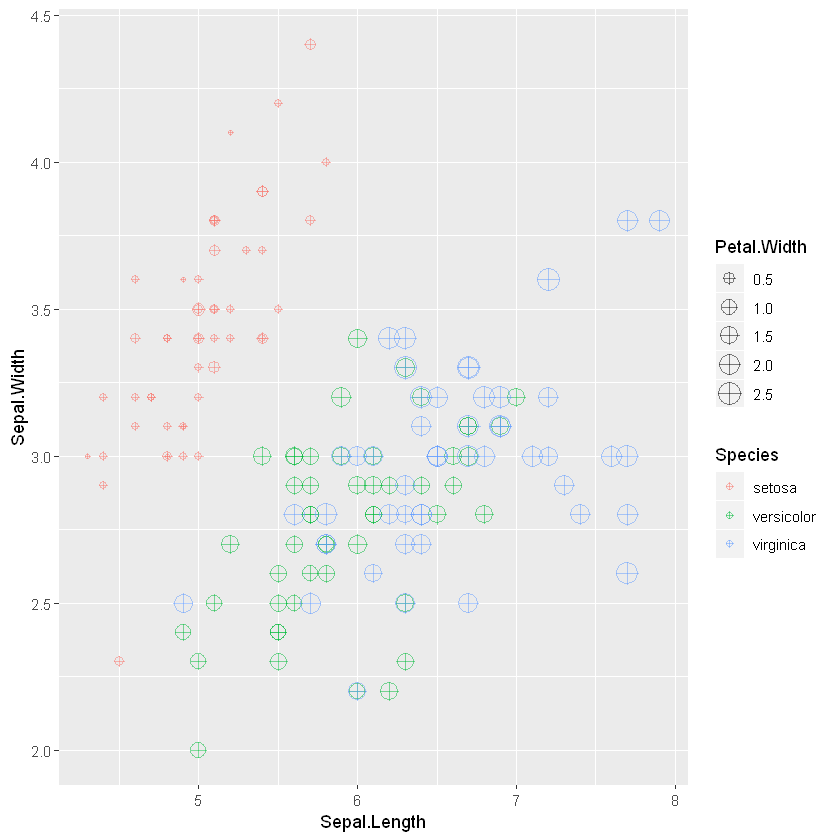

In [26]:
library(ggplot2)
graph <- 
    ggplot(iris,
           aes(x = Sepal.Length, y = Sepal.Width, color = Species, size = Petal.Width)) +
    geom_point(shape = 10, alpha = 0.5)
graph

3) Crea una tabla llamada `iris_mean` que contenga el promedio de todas las variables 
agrupadas por `Species`.

In [24]:
library(dplyr)
iris_mean <- 
    iris %>%
    group_by(Species) %>%
    summarize(
        Mean.Sepal.Length = mean(Sepal.Length),
        Mean.Sepal.Width = mean(Sepal.Width),
        Mean.Petal.Length = mean(Petal.Length),
        Mean.Petal.Width = mean(Petal.Width)
    )
iris_mean

Species,Mean.Sepal.Length,Mean.Sepal.Width,Mean.Petal.Length,Mean.Petal.Width
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


4) Con esta tabla, agrega a tu gráfica anterior otra geometría de puntos para agregar 
los promedios en la visualización. Asegúrate que el primer argumento de la geometría 
sea el nombre de tu tabla y que los parámetros sean `shape = 23`, `size = 4`, 
`fill = 'black'` y `stroke = 2`. También agrega etiquetas, temas y los cambios 
necesarios para mejorar tu visualización.

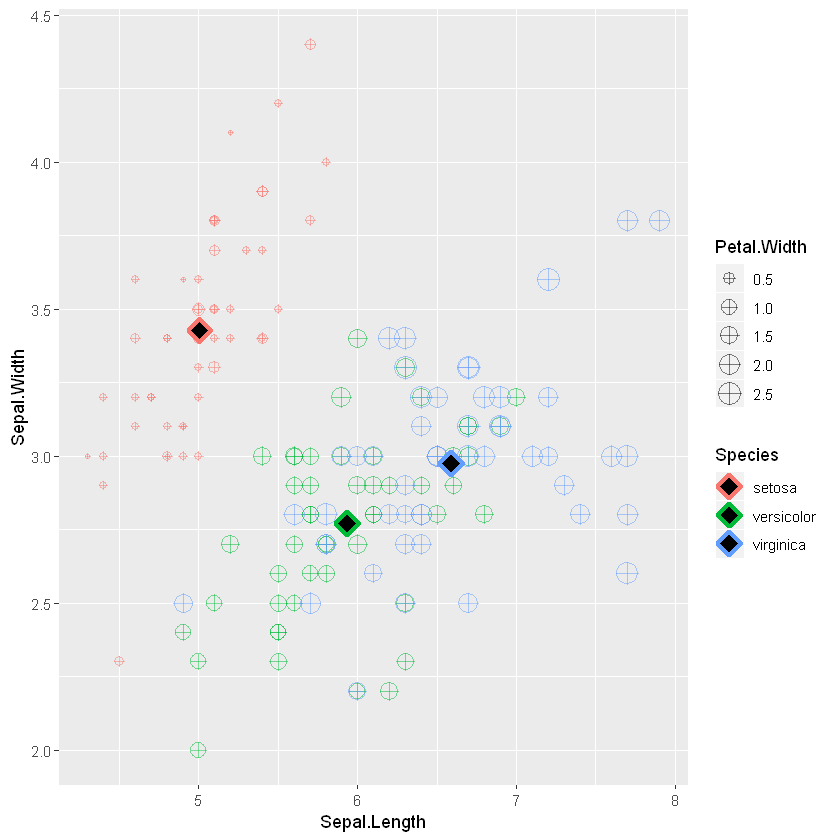

In [28]:
graph2 <- graph + 
    geom_point(data = iris_mean, 
               aes(x = Mean.Sepal.Length, y = Mean.Sepal.Width, color = Species, size = Mean.Petal.Width),
               shape = 23, size = 4, fill = "black", stroke = 2)
graph2